<a href="https://colab.research.google.com/github/Rakesh2711/Revoultbankexam/blob/master/Revoult_Exam_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import pandas_profiling as pp
import seaborn as sns
# from ggplot import *
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from collections import Counter
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot
# configure_plotly_browser_state()
init_notebook_mode(connected=False)
%matplotlib inline
%matplotlib inline

In [0]:
# import pandas as pd
# import glob

# path = r'C:\Users\rakesh.i.kumar.singh\Downloads\Data_Revoult\Transaction data' # use your path
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# transaction = pd.concat(li, axis=0, ignore_index=True)

In [0]:
# os.chdir('C:\\Users\\rakesh.i.kumar.singh\\Downloads\\Data_Revoult')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/data')

# Load Data

In [0]:
# # Read 4 files

device = pd.read_csv('rev-devices.csv')
notification =  pd.read_csv('rev-notifications.csv')
transaction = pd.read_csv('rev-transactions.csv')
users =  pd.read_csv('rev-users.csv')

In [0]:
transaction.head()

transaction_id transactions_type  ...    user_id                created_date
0  transaction_0          TRANSFER  ...   user_898  2018-04-03 03:34:21.784487
1  transaction_1      CARD_PAYMENT  ...  user_1652  2019-03-19 06:15:59.537032
2  transaction_2      CARD_PAYMENT  ...  user_1652  2019-03-18 18:53:41.323032
3  transaction_3          TRANSFER  ...  user_1652  2019-03-22 14:20:01.513032
4  transaction_4      CARD_PAYMENT  ...  user_5509  2019-03-22 05:42:50.316652

[5 rows x 12 columns]

In [0]:
users.head()

user_id  birth_year  ... num_referrals num_successful_referrals
0  user_0        1989  ...             0                        0
1  user_1        1975  ...             0                        0
2  user_2        1987  ...             0                        0
3  user_3        1994  ...             0                        0
4  user_4        1985  ...             0                        0

[5 rows x 12 columns]

# Data Quality Check / Feature Creation /Missing Value Imputation

In [0]:
# Drpoing the columns which are having more than 40% of the data missing


for col in transaction.columns:
    if transaction[col].isna().sum()>(len(transaction)/100)*40:
        del transaction[col]

In [0]:
# Missing value imputation for users table
users['attributes_notifications_marketing_push'].value_counts(dropna=False)/len(users)*100

1.0    62.521873
NaN    34.019557
0.0     3.458569
Name: attributes_notifications_marketing_push, dtype: float64

In [0]:
users['attributes_notifications_marketing_email'].value_counts(dropna=False)/len(users)*100

1.0    59.114771
NaN    34.019557
0.0     6.865672
Name: attributes_notifications_marketing_email, dtype: float64

In [0]:
transaction['created_date'] = transaction['created_date'].astype('datetime64[ns]')
transaction['t_month'] = transaction['created_date'].dt.month

transaction['t_year'] = transaction['created_date'].dt.year

transaction['t_day'] = transaction['created_date'].dt.day

In [0]:
del transaction['created_date']
notification['created_date']=notification['created_date'].astype('datetime64[ns]')

notification['n_month'] = notification['created_date'].dt.month

notification['n_year'] = notification['created_date'].dt.year

notification['n_day'] = notification['created_date'].dt.day

# notification['n_week'] = notification['created_date'].dt.week

del notification['created_date']

In [0]:
users['created_date']=users['created_date'].astype('datetime64[ns]')

users['u_month'] = users['created_date'].dt.month

users['u_year'] = users['created_date'].dt.year

users['u_day'] = users['created_date'].dt.day

In [0]:
del users['created_date']

In [0]:
transaction.shape,users.shape

((2740075, 10), (19430, 14))

In [0]:
dfu = pd.merge(transaction,users,how='left')
print(dfu.shape)
dfu.head()

(2740075, 23)


transaction_id transactions_type  ... u_year  u_day
0  transaction_0          TRANSFER  ...   2018     11
1  transaction_1      CARD_PAYMENT  ...   2018      1
2  transaction_2      CARD_PAYMENT  ...   2018      1
3  transaction_3          TRANSFER  ...   2018      1
4  transaction_4      CARD_PAYMENT  ...   2018     18

[5 rows x 23 columns]

In [0]:
notification.shape

(121813, 7)

In [0]:
dfun = pd.merge(dfu,notification,how='inner',left_on=['user_id','t_year','t_month'],right_on=['user_id','n_year','n_month'])

dfun.sample(10)

transaction_id transactions_type  ... n_year  n_day
95888    transaction_1238099      CARD_PAYMENT  ...   2018      5
905424   transaction_1210737          TRANSFER  ...   2019     27
68048      transaction_61563               ATM  ...   2018     13
944893    transaction_884852          TRANSFER  ...   2019     28
430142   transaction_1431567      CARD_PAYMENT  ...   2019     26
1394957  transaction_2007643      CARD_PAYMENT  ...   2019     23
983883   transaction_1268228      CARD_PAYMENT  ...   2019     27
654815    transaction_358921      CARD_PAYMENT  ...   2019      4
1024627  transaction_2658602          TRANSFER  ...   2019      4
1645284  transaction_2247381      CARD_PAYMENT  ...   2019     26

[10 rows x 29 columns]

# EDA

In [0]:
dfun.groupby(['user_id','n_year','n_month','t_year','t_month'])['amount_usd'].mean()

user_id    n_year  n_month  t_year  t_month
user_0     2018    10       2018    10         25.740741
                   11       2018    11         10.230833
                   12       2018    12          9.808000
           2019    1        2019    1           2.331429
                   2        2019    2          55.370952
                                                 ...    
user_9999  2018    10       2018    10          8.909032
                   11       2018    11          3.757500
           2019    1        2019    1          42.583333
                   2        2019    2           9.321000
                   3        2019    3          18.016923
Name: amount_usd, Length: 45189, dtype: float64

In [0]:
dfun.groupby(['user_id','u_year','u_month','t_year','t_month'])['amount_usd'].mean()

user_id    u_year  u_month  t_year  t_month
user_0     2018    1        2018    10         25.740741
                                    11         10.230833
                                    12          9.808000
                            2019    1           2.331429
                                    2          55.370952
                                                 ...    
user_9999  2018    8        2018    10          8.909032
                                    11          3.757500
                            2019    1          42.583333
                                    2           9.321000
                                    3          18.016923
Name: amount_usd, Length: 45189, dtype: float64

In [0]:
dfun.groupby('user_id')['amount_usd'].mean()

user_id
user_0        39.880929
user_1        45.195862
user_10       58.694124
user_100     125.116338
user_1000    357.869565
                ...    
user_9994     13.452353
user_9995     37.172373
user_9996     63.604262
user_9997     13.046792
user_9999     12.222614
Name: amount_usd, Length: 16363, dtype: float64

In [0]:
# pd.set_option('display.max_rows',500)
dfun.groupby(['transactions_type','transactions_currency','t_year'])['amount_usd'].mean()

transactions_type  transactions_currency  t_year
ATM                AED                    2018       96.536061
                                          2019      190.357791
                   AUD                    2018      125.201984
                                          2019       83.694142
                   BGN                    2019       86.840000
                                                       ...    
TRANSFER           USD                    2019      306.367520
                   XRP                    2018       42.265663
                                          2019       34.317368
                   ZAR                    2018      266.157455
                                          2019      118.398730
Name: amount_usd, Length: 416, dtype: float64

In [0]:
# transactions_state
dfun.groupby(['transactions_state','transactions_currency','t_year'])['amount_usd'].mean()

transactions_state  transactions_currency  t_year
CANCELLED           AED                    2019       8.270000
                    AUD                    2018      14.390000
                                           2019      12.470000
                    CAD                    2018      47.313750
                                           2019      39.540000
                                                       ...    
REVERTED            USD                    2018      32.135162
                                           2019      18.996303
                    XRP                    2018       0.330000
                    ZAR                    2018      56.955556
                                           2019      85.046429
Name: amount_usd, Length: 262, dtype: float64

In [0]:
# direction
dfun.groupby(['direction','transactions_currency','t_year'])['amount_usd'].mean()

direction  transactions_currency  t_year
INBOUND    AED                    2018      1496.291304
                                  2019       748.076800
           AUD                    2018       137.164000
                                  2019        69.289788
           BGN                    2019        17.325000
                                               ...     
OUTBOUND   USD                    2019       149.949391
           XRP                    2018        93.550231
                                  2019        79.535052
           ZAR                    2018        39.458675
                                  2019        37.820934
Name: amount_usd, Length: 121, dtype: float64

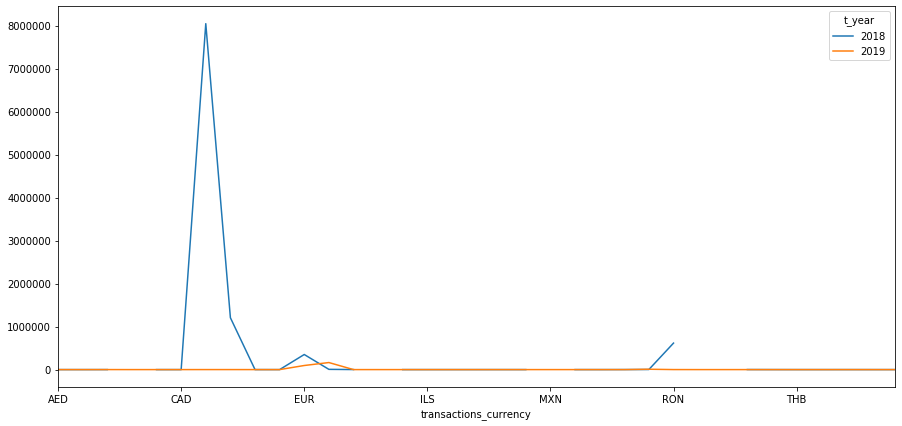

In [0]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
dfun.groupby(['transactions_currency','t_year'])['amount_usd'].mean().unstack().plot(ax=ax)

In [0]:
# See the count of transaction done by each user in each year
# You can also fetch a specific user to see his count of transactions
dfun.groupby(['user_id','t_year'])['transaction_id'].count()['user_0']

t_year
2018    49
2019    91
Name: transaction_id, dtype: int64

In [0]:
dfun.shape

(1748606, 29)

In [0]:
dfund = pd.merge(dfun,device,on=['user_id'],how='left')

dfund.head()

transaction_id transactions_type transactions_currency  ...  n_year n_day  brand
0  transaction_1      CARD_PAYMENT                   AED  ...    2019     1  Apple
1  transaction_2      CARD_PAYMENT                   AED  ...    2019     1  Apple
2  transaction_3          TRANSFER                   AED  ...    2019     1  Apple
3  transaction_6      CARD_PAYMENT                   AED  ...    2019     1  Apple
4  transaction_7      CARD_PAYMENT                   AED  ...    2019     1  Apple

[5 rows x 30 columns]

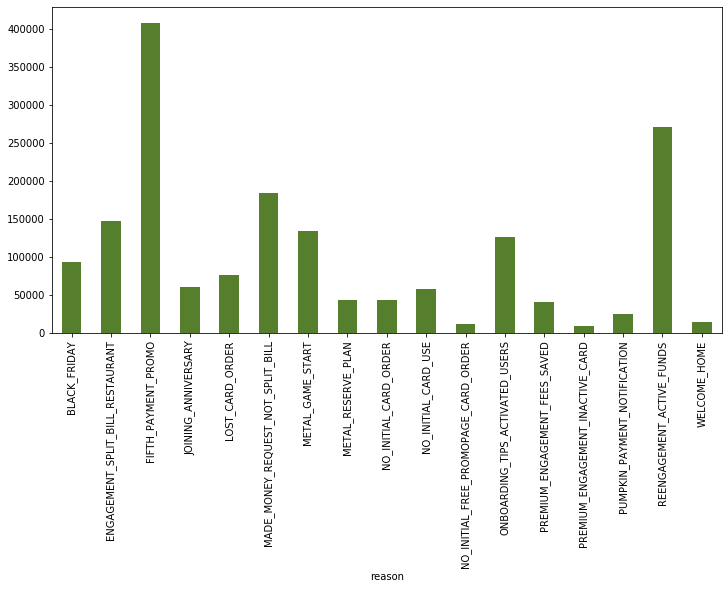

In [0]:
# See the reason for most of the transactions
dfund.groupby('reason')['transaction_id'].count().plot(kind='bar',color = '#557f2d',figsize=(12,6))

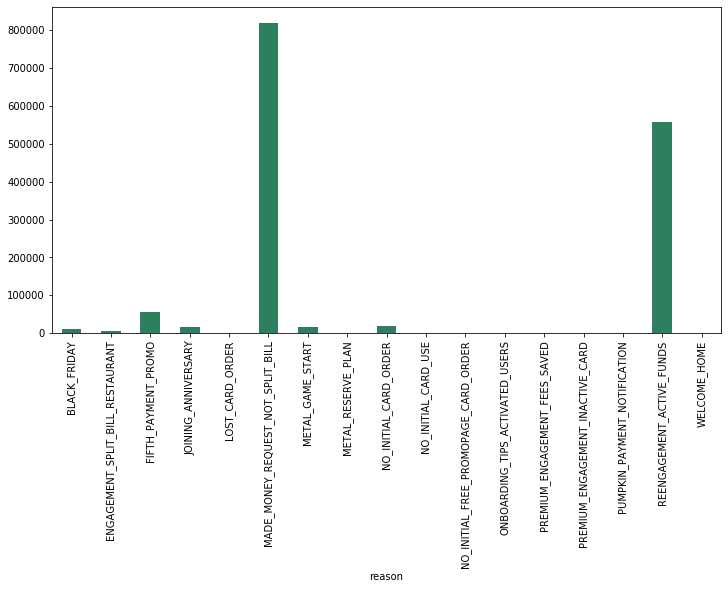

In [0]:
# See the mean amount with respect to reason
dfund.groupby('reason')['amount_usd'].mean().plot(kind='bar',color ='#2d7f5e',figsize=(12,6))

In [0]:
# We can see brand of device does not make much difference on the transaction counts done.
dfund.groupby('brand')['transaction_id'].count()/len(dfund)

brand
Android    0.458630
Apple      0.533997
Unknown    0.007372
Name: transaction_id, dtype: float64

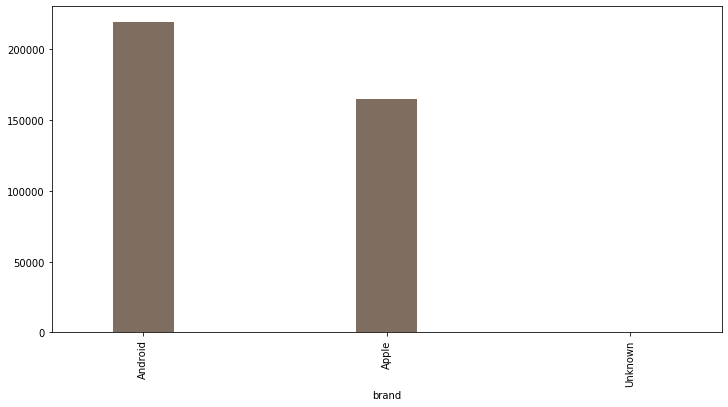

In [0]:
# We can see brand of device does not make much difference on the transaction counts done.
plt.rcParams['figure.figsize']=9,5
dfund.groupby(['brand'])['amount_usd'].mean().plot(kind='bar',width=0.25,color='#7f6d5f',figsize=(12,6))
plt.show()

In [0]:
dfund['brand'].value_counts()

Apple      933751
Android    801964
Unknown     12891
Name: brand, dtype: int64

In [0]:
dfund.shape

(1748606, 30)

In [0]:
dfund.isna().sum()

transaction_id                                   0
transactions_type                                0
transactions_currency                            0
amount_usd                                       0
transactions_state                               0
direction                                        0
user_id                                          0
t_month                                          0
t_year                                           0
t_day                                            0
birth_year                                       0
country                                          0
city                                             0
user_settings_crypto_unlocked                    0
plan                                             0
attributes_notifications_marketing_push     472511
attributes_notifications_marketing_email    472511
num_contacts                                     0
num_referrals                                    0
num_successful_referrals       

In [0]:
# 27% of the data is missing 
dfund.attributes_notifications_marketing_email.value_counts(dropna=False)/len(dfund)

1.0    0.568817
NaN    0.270222
0.0    0.160961
Name: attributes_notifications_marketing_email, dtype: float64

In [0]:
dfund['attributes_notifications_marketing_push'].value_counts(dropna = False)/len(dfund)

1.0    0.635019
NaN    0.270222
0.0    0.094759
Name: attributes_notifications_marketing_push, dtype: float64

In [0]:
dfund.dropna(inplace=True)

In [0]:
dfund.head()

transaction_id transactions_type transactions_currency  ...  n_year n_day  brand
0  transaction_1      CARD_PAYMENT                   AED  ...    2019     1  Apple
1  transaction_2      CARD_PAYMENT                   AED  ...    2019     1  Apple
2  transaction_3          TRANSFER                   AED  ...    2019     1  Apple
3  transaction_6      CARD_PAYMENT                   AED  ...    2019     1  Apple
4  transaction_7      CARD_PAYMENT                   AED  ...    2019     1  Apple

[5 rows x 30 columns]

In [0]:
# Changing the Datatypes of below variables to Integer as the responses are 0 or 1
dfund['attributes_notifications_marketing_push'] = dfund['attributes_notifications_marketing_push'].astype('int64')
dfund['attributes_notifications_marketing_email'] = dfund['attributes_notifications_marketing_email'].astype('int64')

In [0]:
dfund.dtypes

transaction_id                               object
transactions_type                            object
transactions_currency                        object
amount_usd                                  float64
transactions_state                           object
direction                                    object
user_id                                      object
t_month                                       int64
t_year                                        int64
t_day                                         int64
birth_year                                    int64
country                                      object
city                                         object
user_settings_crypto_unlocked                 int64
plan                                         object
attributes_notifications_marketing_push       int64
attributes_notifications_marketing_email      int64
num_contacts                                  int64
num_referrals                                 int64
num_successf

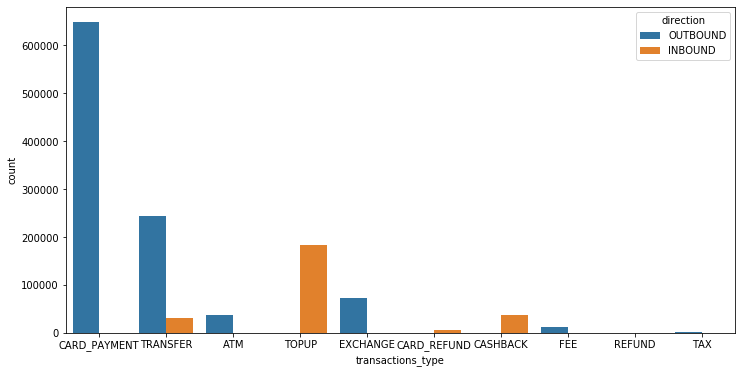

In [0]:
plt.rcParams['figure.figsize'] = 12,6
sns.countplot(x="transactions_type", hue="direction",data=dfund)
plt.show()

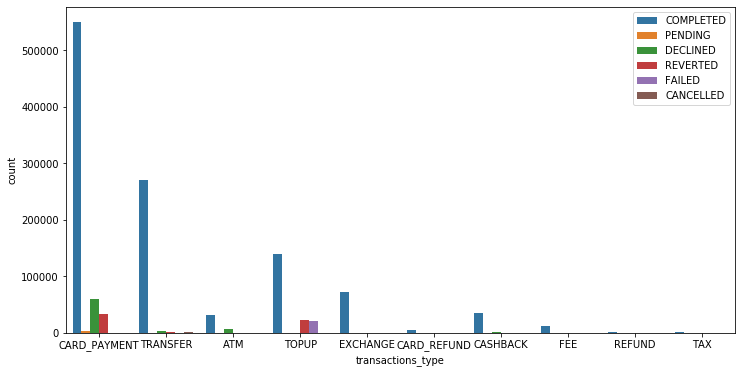

In [0]:
plt.rcParams['figure.figsize'] = 12,6
sns.countplot(x="transactions_type", hue="transactions_state",data=dfund)
plt.legend(loc='upper right')
plt.show()

In [0]:
df_main = dfund

In [0]:
pd.crosstab(df_main["t_year"],df_main["transactions_type"])

transactions_type    ATM  CARD_PAYMENT  CARD_REFUND  ...  TAX  TOPUP  TRANSFER
t_year                                               ...                      
2018               19063        292708         2151  ...  534  98245    107888
2019               19128        355507         3460  ...  653  86050    167643

[2 rows x 10 columns]

In [0]:
df_main.head()

transaction_id transactions_type transactions_currency  ...  n_year n_day  brand
0  transaction_1      CARD_PAYMENT                   AED  ...    2019     1  Apple
1  transaction_2      CARD_PAYMENT                   AED  ...    2019     1  Apple
2  transaction_3          TRANSFER                   AED  ...    2019     1  Apple
3  transaction_6      CARD_PAYMENT                   AED  ...    2019     1  Apple
4  transaction_7      CARD_PAYMENT                   AED  ...    2019     1  Apple

[5 rows x 30 columns]

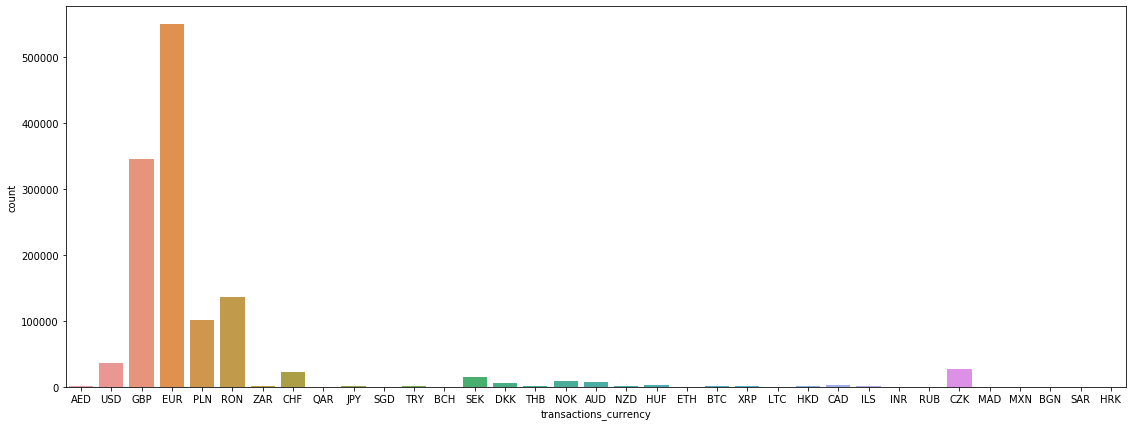

In [0]:
plt.rcParams['figure.figsize']= 19,7
sns.countplot(df_main['transactions_currency'])
plt.show()

In [0]:
df_main.groupby('user_id')['transaction_id'].count().reset_index()

user_id  transaction_id
0          user_0             140
1         user_10             485
2       user_1000              69
3      user_10000             170
4      user_10004             128
...           ...             ...
10683   user_9992              31
10684   user_9994              17
10685   user_9995             531
10686   user_9996             183
10687   user_9997             106

[10688 rows x 2 columns]

In [0]:
df_main.head()

transaction_id transactions_type transactions_currency  ...  n_year n_day  brand
0  transaction_1      CARD_PAYMENT                   AED  ...    2019     1  Apple
1  transaction_2      CARD_PAYMENT                   AED  ...    2019     1  Apple
2  transaction_3          TRANSFER                   AED  ...    2019     1  Apple
3  transaction_6      CARD_PAYMENT                   AED  ...    2019     1  Apple
4  transaction_7      CARD_PAYMENT                   AED  ...    2019     1  Apple

[5 rows x 30 columns]

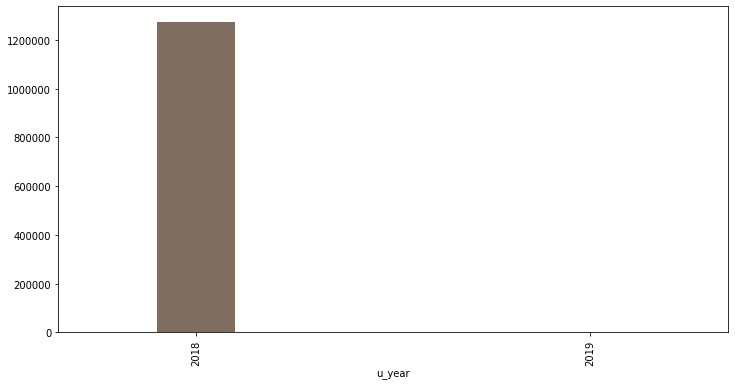

In [0]:
# Most of the users are created in 2018 only 1979 was created in 2019
plt.rcParams['figure.figsize']=6,5
dfund.groupby('u_year')['user_id'].count().plot(kind='bar',width=0.2,color='#7f6d5f',figsize=(12,6))
plt.show()

In [0]:
# Groupby year created to see the number od users created in each year
dfund.groupby('u_year')['user_id'].count()

u_year
2018    1274116
2019       1979
Name: user_id, dtype: int64

u_year  u_month
2018    1           83934
        2           55857
        3          113932
        4           86286
        5          143137
        6          126358
        7          111383
        8          163603
        9          113749
        10          93748
        11          81730
        12         100399
2019    1            1979
Name: user_id, dtype: int64


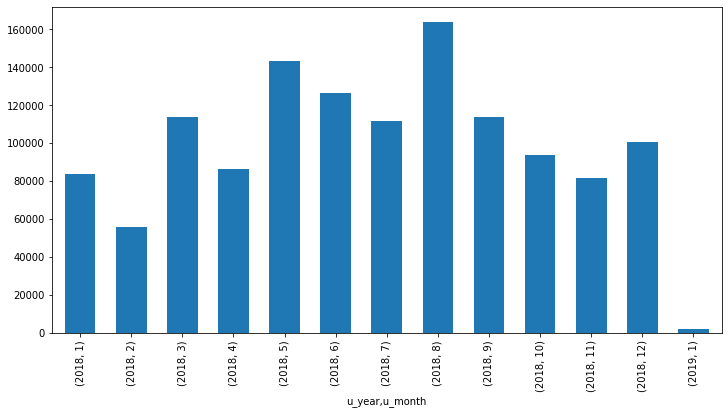

In [0]:
print(dfund.groupby(['u_year','u_month'])['user_id'].count())
dfund.groupby(['u_year','u_month'])['user_id'].count().plot(kind='bar',width=0.6,figsize=(12,6))

t_year  t_month
2018    1            1726
        2            1132
        3           15395
        4            1140
        5            3905
        6           11329
        7           17685
        8           51401
        9           46845
        10         126878
        11         150041
        12         145254
2019    1          195512
        2          306157
        3          142293
        4           51044
        5            8358
Name: transaction_id, dtype: int64


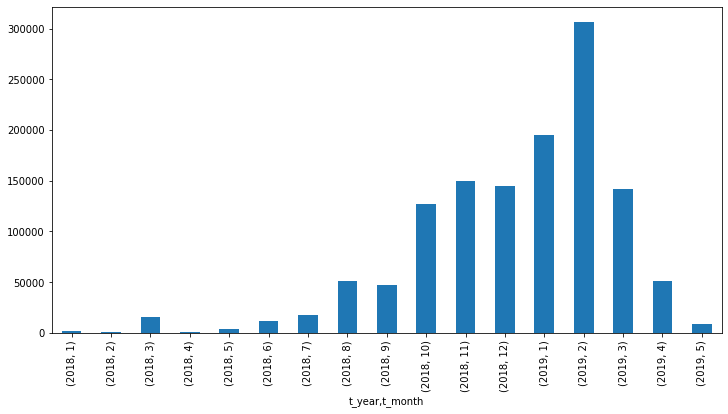

In [0]:
# 
print(dfund.groupby(['t_year','t_month'])['transaction_id'].count())
dfund.groupby(['t_year','t_month'])['transaction_id'].count().plot(kind='bar',figsize=(12,6))

In [0]:
d = dfund.groupby(['user_id','u_year','u_month','t_year','t_month'])['transaction_id'].count().reset_index()

d.head()

user_id  u_year  u_month  t_year  t_month  transaction_id
0  user_0    2018        1    2018       10              27
1  user_0    2018        1    2018       11              12
2  user_0    2018        1    2018       12              10
3  user_0    2018        1    2019        1               7
4  user_0    2018        1    2019        2              84

# Defining our Target Variable

In [0]:
# Define a target metric to measure user engagement. How would you define an ​engaged vs. ​unengaged​ user?
# If user was created in 2018 and he has not done much transaction in 2018 and 2019 he will treated as unengaged user if so he is engaged user.
# These are the users which are identified as unengaged users as there numbers of trasactions are less  than 6 including both the years 2018,2019

unengaged = d[(d.u_year == 2018) & (d.u_month >=1 ) & (d.t_year>=2018) & (d.t_month>=1) & (d.transaction_id<6)]

print(unengaged.shape)

unengaged.head()

(8187, 6)


user_id  u_year  u_month  t_year  t_month  transaction_id
16  user_10004    2018        8    2018        8               4
32  user_10011    2018        8    2018       11               3
33  user_10011    2018        8    2018       12               3
34  user_10011    2018        8    2019        1               3
37  user_10012    2018        8    2018        8               3

In [0]:
d = dfund.groupby('user_id')['transaction_id'].count().reset_index()

d.columns = ['user_id','tran_count_each_user']

dfund = pd.merge(dfund,d,on='user_id',how='left')

del d

In [0]:
 pp.ProfileReport(dfund)

In [0]:
# transaction_id has a high cardinality: 683089 distinct values Warning
# amount_usd has 29707 / 2.3% zeros Zeros
# amount_usd is highly skewed (γ1 = 607.22) Skewed
# user_id has a high cardinality: 10688 distinct values Warning
# city has a high cardinality: 4000 distinct values Warning
# num_contacts has 164678 / 12.9% zeros Zeros
# num_referrals has constant value 0 Rejected
# num_successful_referrals has constant value 0 Rejected
# n_month is highly correlated with t_month (ρ = 1) Rejected
# n_year is highly correlated with t_year (ρ = 1) Rejected
# Dataset has 114658 duplicate rows Warning

In [0]:
dfund.drop(['num_referrals','num_successful_referrals','n_month','n_year'],axis=1,inplace=True)

dfund.drop_duplicates(inplace=True)

# Treating Skewed Data

In [0]:
#MIn Max Normalization
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [0]:
normalized_usd = normalize(dfund.amount_usd)
normalized_usd.describe()

count    1.161437e+06
mean     3.707319e-06
std      1.523908e-03
min      0.000000e+00
25%      3.740414e-11
50%      1.666540e-10
75%      5.583204e-10
max      1.000000e+00
Name: amount_usd, dtype: float64

In [0]:
# Z_score Normalization
for col in ['amount_usd']:
    col_zscore = col + '_zscore'
    dfund[col_zscore] = (dfund[col] - dfund[col].mean())/dfund[col].std(ddof=0)

In [0]:
dfund.head()

transaction_id transactions_type  ... tran_count_each_user  amount_usd_zscore
0  transaction_1      CARD_PAYMENT  ...                  342          -0.002433
1  transaction_2      CARD_PAYMENT  ...                  342          -0.002432
2  transaction_3          TRANSFER  ...                  342          -0.002304
3  transaction_6      CARD_PAYMENT  ...                  342          -0.002433
4  transaction_7      CARD_PAYMENT  ...                  342          -0.002433

[5 rows x 28 columns]

In [0]:
dfund.amount_usd.mean(),dfund.amount_usd.min(),dfund.amount_usd.max()

(189310.0477067968, 0.0, 51063871914.53)

In [0]:
# Using Sigmoid Function -guarantees a 0 to 1 range
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

In [0]:
usd_sigmoid = sigmoid(dfund.amount_usd)

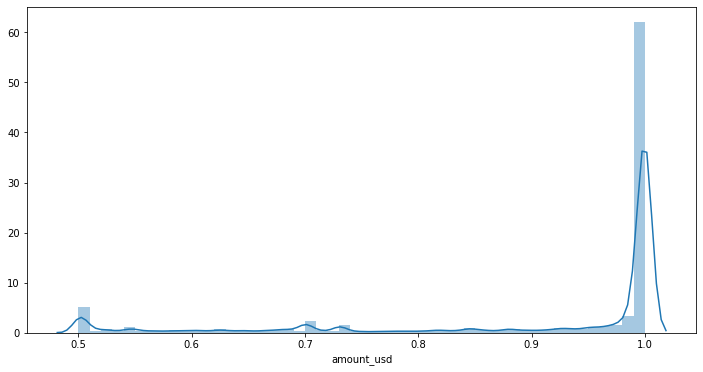

In [0]:
plt.rcParams['figure.figsize']= 12,6
sns.distplot(usd_sigmoid)

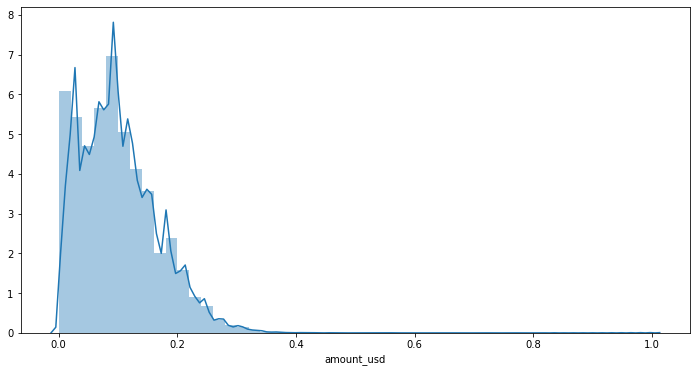

In [0]:
# Mighr get division by zero so added 1
usd_log = np.log(dfund.amount_usd +1)

usd_log_normalized = normalize(usd_log)

sns.distplot(normalize(usd_log_normalized))

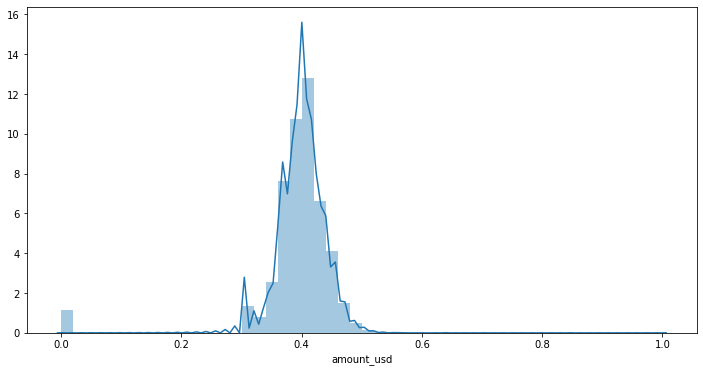

In [0]:
# Log Max Root Normalized
log_max = np.log(dfund.amount_usd.max())
usd_log_max_root = dfund.amount_usd**(1/log_max)
dfund['amount_usd_log_max_norm'] = normalize(usd_log_max_root)
sns.distplot(normalize(usd_log_max_root))

In [0]:
dfund.head()

transaction_id transactions_type  ... amount_usd_zscore  amount_usd_log_max_norm
0  transaction_1      CARD_PAYMENT  ...         -0.002433                 0.411133
1  transaction_2      CARD_PAYMENT  ...         -0.002432                 0.428665
2  transaction_3          TRANSFER  ...         -0.002304                 0.534578
3  transaction_6      CARD_PAYMENT  ...         -0.002433                 0.404596
4  transaction_7      CARD_PAYMENT  ...         -0.002433                 0.416091

[5 rows x 29 columns]

In [0]:
dfund.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'direction', 'user_id', 't_month',
       't_year', 't_day', 'birth_year', 'country', 'city',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts', 'u_month',
       'u_year', 'u_day', 'reason', 'channel', 'status', 'n_day', 'brand',
       'tran_count_each_user', 'amount_usd_zscore', 'amount_usd_log_max_norm'],
      dtype='object')

# EDA Contn..

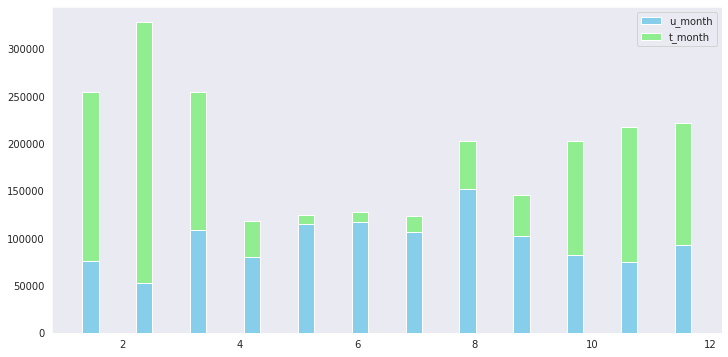

In [0]:
# Monthwise user creations ,user transactions 
plt.rcParams['figure.figsize'] =12,6
sns.set_style('dark')
mylevels = ['u_month','t_month']
plt.hist([dfund['u_month'],dfund['t_month']],stacked=True,bins=12,rwidth=0.3,label=mylevels, color = ["skyblue",'lightgreen'])
plt.legend()
plt.show()

In [0]:
# #Per Year user creations,user transactions
# #We can see we dnt have the data in 2019 which have users created
# plt.rcParams['figure.figsize']=6,3 
# sns.set_style('dark')
# mylevels = ['u_year','t_year']
# plt.hist([dfund['u_year'],dfund['t_year']],stacked=True,bins=3,rwidth=0.3,label=mylevels)
# plt.xlim(2018, 2019)
# plt.legend()
# plt.show()

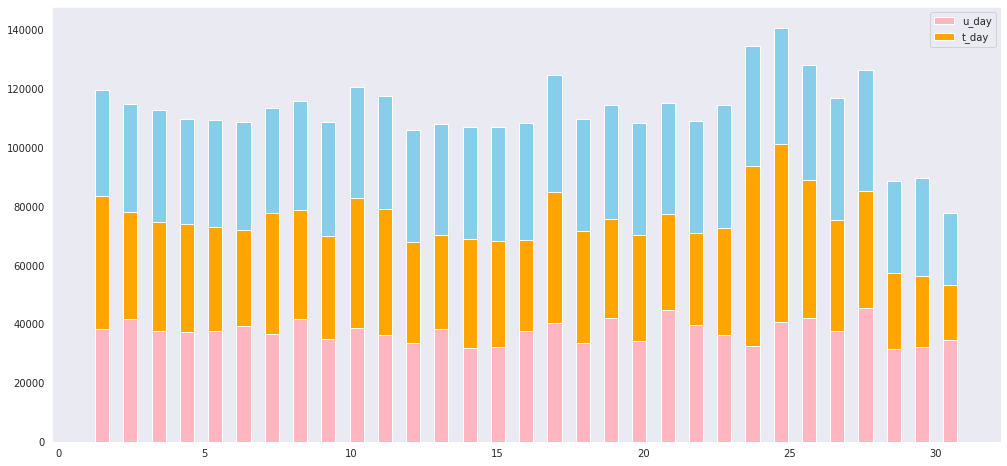

In [0]:
# Per Day user creations,user notifications ,user transactions 
plt.rcParams['figure.figsize']=17,8
sns.set_style('dark')
mylevels = ['u_day','t_day']
plt.hist([dfund['u_day'],dfund['n_day'],dfund['t_day']],stacked=True,bins=31,rwidth=0.5,label=mylevels, color = ["lightpink",'orange','skyblue'])
plt.legend()
plt.show()

In [0]:
# Transaction made by each user each month
d = dfund.groupby(['user_id','t_month','t_year'])['transaction_id'].count().reset_index()

d.head()

user_id  t_month  t_year  transaction_id
0  user_0        1    2019               7
1  user_0        2    2019              84
2  user_0       10    2018              27
3  user_0       11    2018              12
4  user_0       12    2018              10

In [0]:
# Transaction made by each user each month
d1 = dfund.groupby(['user_id','u_year','u_month','t_year','t_month'])['transaction_id'].count().reset_index()

d1.head()

user_id  u_year  u_month  t_year  t_month  transaction_id
0  user_0    2018        1    2018       10              27
1  user_0    2018        1    2018       11              12
2  user_0    2018        1    2018       12              10
3  user_0    2018        1    2019        1               7
4  user_0    2018        1    2019        2              84

In [0]:
d2 = df_main.groupby(['user_id','u_year','u_month','t_year','t_month'])['transaction_id'].count().reset_index()

d2.head(10)

user_id  u_year  u_month  t_year  t_month  transaction_id
0     user_0    2018        1    2018       10              27
1     user_0    2018        1    2018       11              12
2     user_0    2018        1    2018       12              10
3     user_0    2018        1    2019        1               7
4     user_0    2018        1    2019        2              84
5    user_10    2018        1    2018       11              82
6    user_10    2018        1    2019        1             297
7    user_10    2018        1    2019        2              49
8    user_10    2018        1    2019        3              57
9  user_1000    2018        1    2018        1              69

##### Define a target metric to measure user engagement. How would you define an ​engaged vs. ​unengaged​ user?

##### If user was created in 2018 and he has not done much transaction in 2018 and 2019 he will treated as unengaged user if so he is engaged user.

##### These are the users which are identified as unengaged users as there numbers of trasactions are less  than 6 including both the years 2018,2019

In [0]:
unengaged.shape

(8187, 6)

In [0]:
# unengaged_users_list = unengaged_users['user_id']

In [0]:
# [(count,userid) for (count,userid) in enumerate(unengaged_users_list)]

##### *** IF the user was created in 2018 and we have data till 2019 still if he has done total trnsacation less than 6 will be considered as unengaged***

In [0]:
# IF the user was created in 2018 and we have data till 2019 still if he has done total trnsacation less than 6 will be considered as unengaged
# df_main[(df_main['tran_count_each_user']<=12) & (df_main['u_year']==2018)]

In [0]:
unengaged.head()

user_id  u_year  u_month  t_year  t_month  transaction_id
16  user_10004    2018        8    2018        8               4
32  user_10011    2018        8    2018       11               3
33  user_10011    2018        8    2018       12               3
34  user_10011    2018        8    2019        1               3
37  user_10012    2018        8    2018        8               3

In [0]:
unengaged['MayChurn'] = np.ones(len(unengaged))

unengaged.MayChurn = unengaged.MayChurn.astype('int64')

unengaged.head()

user_id  u_year  u_month  t_year  t_month  transaction_id  MayChurn
16  user_10004    2018        8    2018        8               4         1
32  user_10011    2018        8    2018       11               3         1
33  user_10011    2018        8    2018       12               3         1
34  user_10011    2018        8    2019        1               3         1
37  user_10012    2018        8    2018        8               3         1

In [0]:
unengaged.drop(['u_year','u_month','t_year','t_month','transaction_id'],axis=1,inplace=True)

In [0]:
unengaged[unengaged['user_id']=='user_4773']

user_id  MayChurn
19321  user_4773         1
19322  user_4773         1
19325  user_4773         1

In [0]:
dfund_1 = pd.merge(dfund,unengaged,on='user_id',how='left')

dfund_1.head()

transaction_id transactions_type  ... amount_usd_log_max_norm  MayChurn
0  transaction_1      CARD_PAYMENT  ...                0.411133       NaN
1  transaction_2      CARD_PAYMENT  ...                0.428665       NaN
2  transaction_3          TRANSFER  ...                0.534578       NaN
3  transaction_6      CARD_PAYMENT  ...                0.404596       NaN
4  transaction_7      CARD_PAYMENT  ...                0.416091       NaN

[5 rows x 30 columns]

In [0]:
dfund_1.MayChurn.value_counts(dropna=False)

NaN    808804
1.0    470616
Name: MayChurn, dtype: int64

In [0]:
# Filling "NAN" as Zeros beacause 0's are the respones which are for users Not Churn and 1 is there for the users who are going to Churn

In [0]:
dfund_1['MayChurn'].fillna('0',inplace=True)

In [0]:
dfund_1[dfund_1['MayChurn']==1].head()

transaction_id transactions_type  ... amount_usd_log_max_norm  MayChurn
123  transaction_33             TOPUP  ...                0.459189         1
124  transaction_33             TOPUP  ...                0.459189         1
125  transaction_33             TOPUP  ...                0.459189         1
126  transaction_33             TOPUP  ...                0.459189         1
127  transaction_33             TOPUP  ...                0.459189         1

[5 rows x 30 columns]

In [0]:
dfund_1['MayChurn'].value_counts()

0      808804
1.0    470616
Name: MayChurn, dtype: int64

In [0]:
dfund_1['MayChurn'] = dfund_1['MayChurn'].astype('int64')

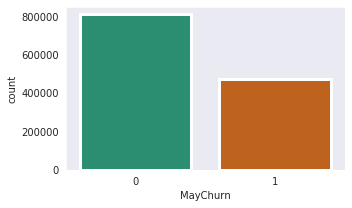

In [0]:
plt.figure(figsize=(5,3))
sns.countplot(dfund_1['MayChurn'],linewidth=3,palette="Dark2")
plt.show()

In [0]:
# Converting target variable to integer
dfund_1['MayChurn'] = dfund_1['MayChurn'].astype('int64')

In [0]:
dfund_1.dtypes

transaction_id                               object
transactions_type                            object
transactions_currency                        object
amount_usd                                  float64
transactions_state                           object
direction                                    object
user_id                                      object
t_month                                       int64
t_year                                        int64
t_day                                         int64
birth_year                                    int64
country                                      object
city                                         object
user_settings_crypto_unlocked                 int64
plan                                         object
attributes_notifications_marketing_push       int64
attributes_notifications_marketing_email      int64
num_contacts                                  int64
u_month                                       int64
u_year      

# Data Preperation for Training the model /EDA Continues

In [0]:
# Sepearting catagorical and numerical columns 

cat_columns = [col for col in dfund_1.select_dtypes('object') if col not in ['transaction_id','user_id','city','MayChurn']]

num_columns =dfund_1.select_dtypes(['float64','int64']).columns

print(cat_columns)

print('\n')

print(num_columns)

['transactions_type', 'transactions_currency', 'transactions_state', 'direction', 'country', 'plan', 'reason', 'channel', 'status', 'brand']


Index(['amount_usd', 't_month', 't_year', 't_day', 'birth_year',
       'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts', 'u_month',
       'u_year', 'u_day', 'n_day', 'tran_count_each_user', 'amount_usd_zscore',
       'amount_usd_log_max_norm', 'MayChurn'],
      dtype='object')


In [0]:
dfund_1.shape

(1279420, 30)

In [0]:
# Adding one Random variable to filter out the feature with their feature importance
dfund_1['random_variable'] = np.random.random(len(dfund_1))

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

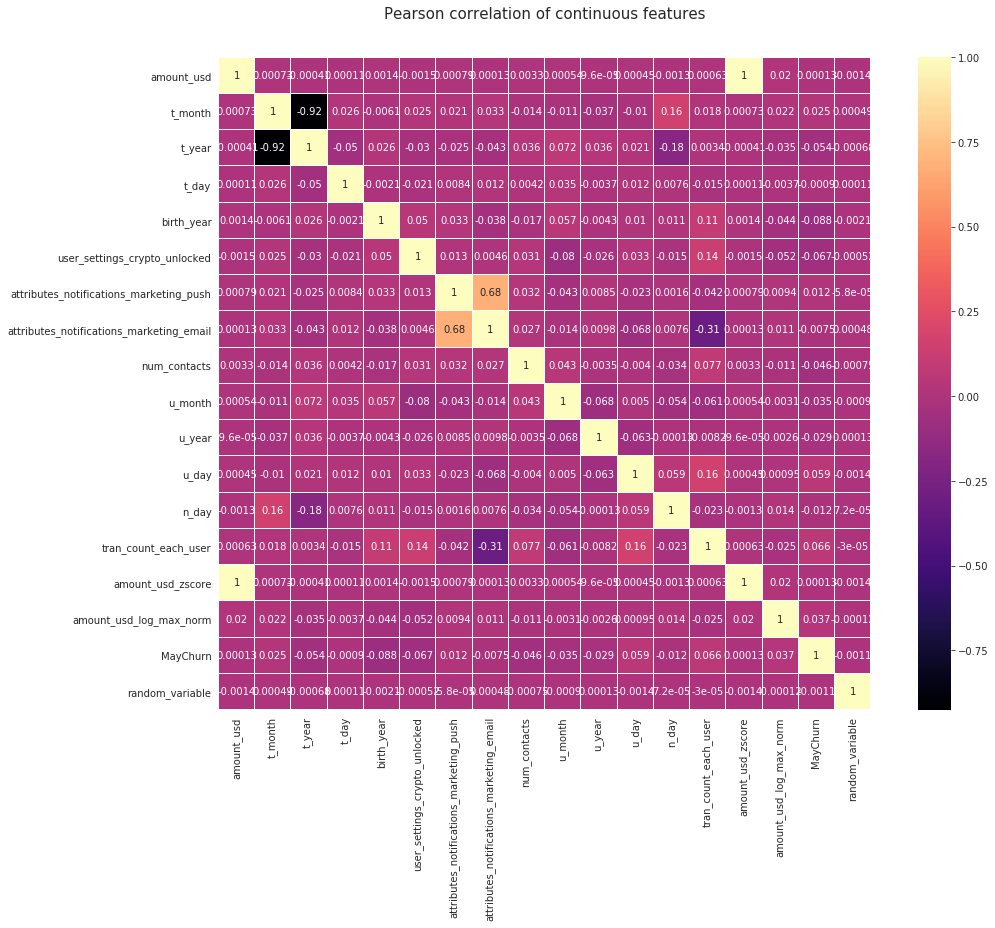

In [0]:
#Checking the correlation of each variables
colormap = plt.cm.magma
plt.figure(figsize=(17,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(dfund_1.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [0]:
dfund_1.drop(['t_year','t_month','attributes_notifications_marketing_push','amount_usd'],1,inplace=True)


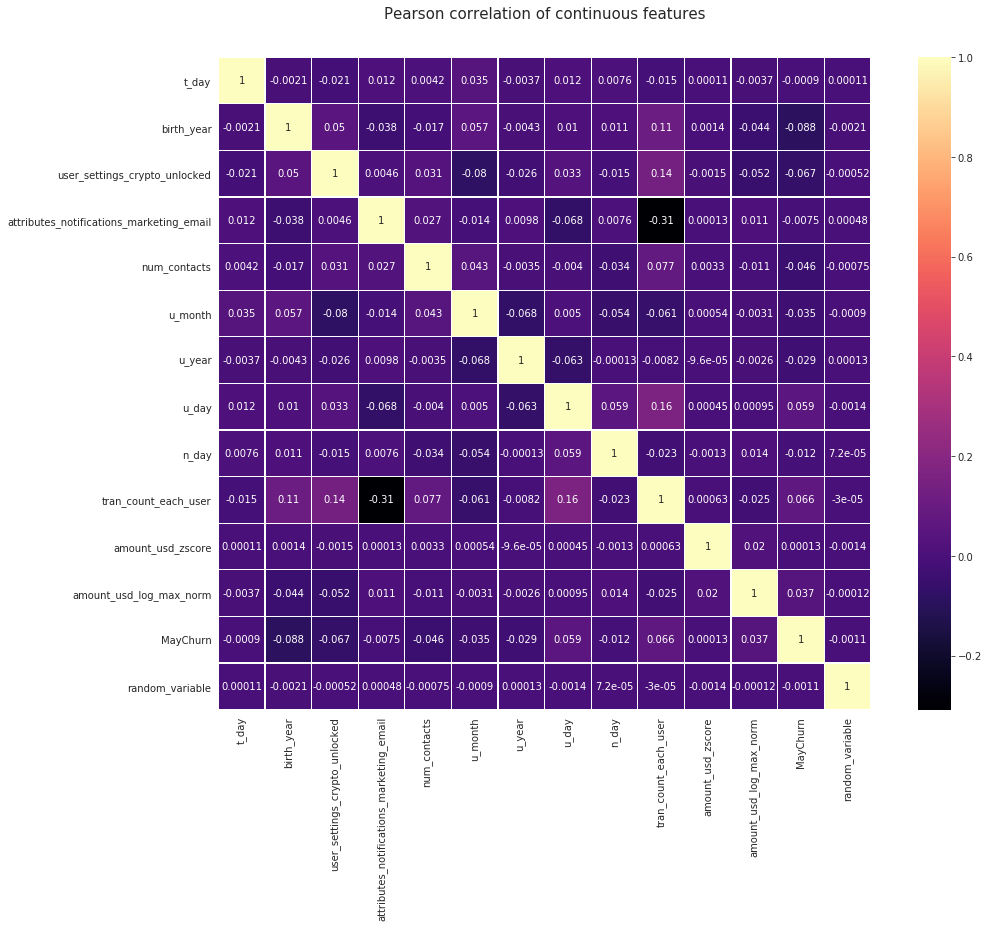

In [0]:
# After dropping the variables check for Correlations plot
#Checking the correlation of each variables
colormap = plt.cm.magma
plt.figure(figsize=(17,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(dfund_1.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [0]:
dfund_1.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'transactions_state', 'direction', 'user_id', 't_day', 'birth_year',
       'country', 'city', 'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_email', 'num_contacts', 'u_month',
       'u_year', 'u_day', 'reason', 'channel', 'status', 'n_day', 'brand',
       'tran_count_each_user', 'amount_usd_zscore', 'amount_usd_log_max_norm',
       'MayChurn', 'random_variable'],
      dtype='object')

In [0]:
# Dropping transaction_id,user_id,city due to very high cardinality
del dfund_1['transaction_id']
del dfund_1['user_id']
del dfund_1['city']

In [0]:
# you can use following method if you want to ignore categories with too low frequencies , 
# ignoring categories with low frequencies however will result in fewer columns without 
# affecting model performance too much .

for col in cat_columns:
    freqs=dfund_1[col].value_counts()
    k=freqs.index[freqs>5000][:-1]
    for cat in k:
        name=str(col)+'_'+str(cat)
        dfund_1[name]=(dfund_1[col]==cat).astype(int)
    del dfund_1[col]
    print(col)

transactions_type
transactions_currency
transactions_state
direction
country
plan
reason
channel
status
brand


In [0]:
dfund_1.head()

t_day  birth_year  ...  brand_Apple  brand_Android
0     19        1971  ...            1              0
1     18        1971  ...            1              0
2     22        1971  ...            1              0
3     17        1971  ...            1              0
4     17        1971  ...            1              0

[5 rows x 81 columns]

In [0]:
# Seperating Dependent and Independent variables
X = dfund_1.drop(['MayChurn'],axis=1)
y = dfund_1['MayChurn']

In [0]:
from sklearn import preprocessing
names = X.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [0]:
scaled_df.head()

t_day  birth_year  ...  brand_Apple  brand_Android
0  0.353227   -1.547295  ...     0.995545      -0.981015
1  0.239067   -1.547295  ...     0.995545      -0.981015
2  0.695710   -1.547295  ...     0.995545      -0.981015
3  0.124906   -1.547295  ...     0.995545      -0.981015
4  0.124906   -1.547295  ...     0.995545      -0.981015

[5 rows x 80 columns]

***Independent Variables are in Scaled_df***
***Dependent Variables is in y***

In [0]:
scaled_df.columns

Index(['t_day', 'birth_year', 'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_email', 'num_contacts', 'u_month',
       'u_year', 'u_day', 'n_day', 'tran_count_each_user', 'amount_usd_zscore',
       'amount_usd_log_max_norm', 'random_variable',
       'transactions_type_CARD_PAYMENT', 'transactions_type_TRANSFER',
       'transactions_type_TOPUP', 'transactions_type_EXCHANGE',
       'transactions_type_ATM', 'transactions_type_CASHBACK',
       'transactions_type_FEE', 'transactions_currency_EUR',
       'transactions_currency_GBP', 'transactions_currency_RON',
       'transactions_currency_PLN', 'transactions_currency_USD',
       'transactions_currency_CZK', 'transactions_currency_CHF',
       'transactions_currency_SEK', 'transactions_currency_NOK',
       'transactions_currency_AUD', 'transactions_state_COMPLETED',
       'transactions_state_DECLINED', 'transactions_state_REVERTED',
       'direction_OUTBOUND', 'country_GB', 'country_IE', 'country_RO',


In [0]:
scaled_df

t_day  birth_year  ...  brand_Apple  brand_Android
0        0.353227   -1.547295  ...     0.995545      -0.981015
1        0.239067   -1.547295  ...     0.995545      -0.981015
2        0.695710   -1.547295  ...     0.995545      -0.981015
3        0.124906   -1.547295  ...     0.995545      -0.981015
4        0.124906   -1.547295  ...     0.995545      -0.981015
...           ...         ...  ...          ...            ...
1279415 -0.445899   -0.713760  ...    -1.004475       1.019352
1279416 -0.445899   -0.713760  ...    -1.004475       1.019352
1279417 -1.473347   -0.609568  ...     0.995545      -0.981015
1279418 -1.473347   -0.609568  ...     0.995545      -0.981015
1279419 -1.359186    0.328158  ...     0.995545      -0.981015

[1279420 rows x 80 columns]

In [0]:
#Checking if any catagorical columns are left in the Data
# dfund_1.dtypes
scaled_df.select_dtypes('object')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1279420 rows x 0 columns]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

In [0]:
print('---------Shape of the Data---------')
rows = X_train.shape[0]
columns = X_train.shape[1]
print("The X_train dataset contains {0} rows and {1} columns".format(rows, columns))
rows1 = X_test.shape[0]
columns1 = X_test.shape[1]
print("The X_test dataset contains {0} rows and {1} columns".format(rows1, columns1))


---------Shape of the Data---------
The X_train dataset contains 1023536 rows and 80 columns
The X_test dataset contains 255884 rows and 80 columns


In [0]:
features = X_train.columns.values
features

array(['t_day', 'birth_year', 'user_settings_crypto_unlocked',
       'attributes_notifications_marketing_email', 'num_contacts',
       'u_month', 'u_year', 'u_day', 'n_day', 'tran_count_each_user',
       'amount_usd_zscore', 'amount_usd_log_max_norm', 'random_variable',
       'transactions_type_CARD_PAYMENT', 'transactions_type_TRANSFER',
       'transactions_type_TOPUP', 'transactions_type_EXCHANGE',
       'transactions_type_ATM', 'transactions_type_CASHBACK',
       'transactions_type_FEE', 'transactions_currency_EUR',
       'transactions_currency_GBP', 'transactions_currency_RON',
       'transactions_currency_PLN', 'transactions_currency_USD',
       'transactions_currency_CZK', 'transactions_currency_CHF',
       'transactions_currency_SEK', 'transactions_currency_NOK',
       'transactions_currency_AUD', 'transactions_state_COMPLETED',
       'transactions_state_DECLINED', 'transactions_state_REVERTED',
       'direction_OUTBOUND', 'country_GB', 'country_IE', 'country_RO',


In [0]:
# We have class imbalance here will work on that treatment
y_train.value_counts()/len(y_train)

0    0.632215
1    0.367785
Name: MayChurn, dtype: float64

# Feature selection using Random forest and XGBoost 

In [0]:
# Running Random forest to see the feature Importance of each variables
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,verbose=20,n_jobs=-1)
rf.fit(X_train, y_train)
features = features
print("----- Training Done -----")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100



[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.4s


building tree 3 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.9s


building tree 4 of 100


[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    9.3s


building tree 5 of 100


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.7s


building tree 6 of 100


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.9s


building tree 7 of 100


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   14.4s


building tree 8 of 100


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   18.8s


building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.5s


building tree 11 of 100


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   24.4s


building tree 12 of 100


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   28.2s


building tree 13 of 100


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   29.6s


building tree 14 of 100


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   33.2s


building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   37.9s


building tree 17 of 100
building tree 18 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.2s


building tree 19 of 100


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   44.7s


building tree 20 of 100
building tree 21 of 100


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:   49.5s


building tree 22 of 100


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   52.9s


building tree 23 of 100


[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:   54.1s


building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   58.9s


building tree 25 of 100
building tree 26 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min


building tree 27 of 100


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min


building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  1.1min


building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.2min


building tree 31 of 100


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  1.3min


building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  1.3min


building tree 34 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min


building tree 35 of 100


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min


building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:  1.5min


building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min


building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.6min


building tree 41 of 100


[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:  1.7min


building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min


building tree 44 of 100


[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:  1.8min


building tree 45 of 100


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:  1.9min


building tree 46 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.9min


building tree 47 of 100


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min


building tree 48 of 100


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:  2.0min


building tree 49 of 100
building tree 50 of 100


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:  2.1min


building tree 51 of 100
building tree 52 of 100


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:  2.1min


building tree 53 of 100
building tree 54 of 100


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.2min


building tree 55 of 100
building tree 56 of 100


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:  2.3min


building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.4min


building tree 59 of 100


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.4min


building tree 60 of 100


[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:  2.5min


building tree 61 of 100


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:  2.5min


building tree 62 of 100


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.5min


building tree 63 of 100


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:  2.6min


building tree 64 of 100


[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:  2.6min


building tree 65 of 100


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.7min


building tree 66 of 100


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  2.7min


building tree 67 of 100


[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  2.7min


building tree 68 of 100


[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:  2.8min


building tree 69 of 100


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.8min


building tree 70 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  2.9min


building tree 71 of 100
building tree 72 of 100


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:  2.9min


building tree 73 of 100


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:  3.0min


building tree 74 of 100


[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:  3.0min


building tree 75 of 100
building tree 76 of 100


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:  3.1min


building tree 77 of 100
building tree 78 of 100


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.2min


building tree 79 of 100
building tree 80 of 100


[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed:  3.3min


building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.4min


building tree 83 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  3.4min


building tree 84 of 100


[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:  3.4min


building tree 85 of 100
building tree 86 of 100


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:  3.5min


building tree 87 of 100


[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:  3.6min


building tree 88 of 100


[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:  3.6min


building tree 89 of 100


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  3.7min


building tree 90 of 100


[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  3.7min


building tree 91 of 100


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.8min


building tree 92 of 100


[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:  3.8min


building tree 93 of 100


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:  3.8min


building tree 94 of 100


[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:  3.9min


building tree 95 of 100


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.9min


building tree 96 of 100
building tree 97 of 100


[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  4.0min


building tree 98 of 100


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  4.0min


building tree 99 of 100
building tree 100 of 100
----- Training Done -----


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.1min finished


In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
configure_plotly_browser_state()
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [0]:
configure_plotly_browser_state()
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(verbose = 20)
gb.fit(X_train, y_train)
features = features
print("----- Training Done -----")

In [0]:
 #Scatter plot
configure_plotly_browser_state() 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Machine Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [0]:
configure_plotly_browser_state() 
x, y = (list(x) for x in zip(*sorted(zip(gb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Gradient Boosting Classifer Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

*** We can see both XGB and Random Forest are giving me similar results So will drop those variables which are having feature importance greater than the inserted Random_variable***

In [0]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), reverse = True)))

list(zip(x,y))

[(0.2125936745452187, 'tran_count_each_user'),
 (0.09566761515795318, 'num_contacts'),
 (0.09440634147788375, 'birth_year'),
 (0.09327397617025655, 'u_day'),
 (0.07354617144835872, 'u_month'),
 (0.050473788142836096, 'n_day'),
 (0.0205427377032803, 'amount_usd_log_max_norm'),
 (0.01897297532242569, 't_day'),
 (0.01584760725009384, 'user_settings_crypto_unlocked'),
 (0.014630898866353725, 'brand_Apple'),
 (0.014415044394187922, 'brand_Android'),
 (0.01436146434462932, 'reason_REENGAGEMENT_ACTIVE_FUNDS'),
 (0.01263500413472826, 'country_GB'),
 (0.012517072221454914, 'attributes_notifications_marketing_email'),
 (0.01064785046564111, 'status_SENT'),
 (0.010376601839776399, 'plan_STANDARD'),
 (0.00966739524919047, 'transactions_currency_EUR'),
 (0.009369042569552332, 'random_variable'),
 (0.009353159213073312, 'country_FR'),
 (0.009094755437481079, 'plan_PREMIUM'),
 (0.009040777159069261, 'country_IE'),
 (0.008877299753494355, 'transactions_currency_GBP'),
 (0.007436779628984, 'amount_usd_

***Dropiing the variables which are having feature importance value greater than random_variable***

In [0]:
# var_to_drop = ['transactions_type_TRANSFER','transactions_type_EXCHANGE','transactions_type_CASHBACK','transactions_type_CARD_PAYMENT','transactions_type_ATM', \
#                'transactions_state_REVERTED','transactions_state_DECLINED','transactions_state_COMPLETED','transactions_currency_USD','transactions_currency_SEK',\
#                'transactions_currency_NOK','transactions_currency_CHF','transactions_currency_AUD','t_day','reason_WELCOME_HOME','reason_PUMPKIN_PAYMENT_NOTIFICATION',\
#                'reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL','reason_ENGAGEMENT_SPLIT_BILL_RESTAURANT','random_variable','direction_OUTBOUND','country_RO','country_GR',\
#                'country_CH','channel_EMAIL']

In [0]:
var_to_keep = ['tran_count_each_user','num_contacts','u_day','birth_year','u_month','n_day','amount_usd_log_max_norm','t_day',\
               'user_settings_crypto_unlocked','brand_Android','brand_Apple','reason_REENGAGEMENT_ACTIVE_FUNDS','attributes_notifications_marketing_email',\
               'country_GB','status_SENT','transactions_currency_EUR','country_FR','plan_STANDARD']

In [0]:
X_train[var_to_keep]

tran_count_each_user  num_contacts  ...  country_FR  plan_STANDARD
122155              -0.232891     -0.419779  ...   -0.310791       0.615025
766795              -0.243565     -0.072525  ...   -0.310791       0.615025
938468              -0.196125     -0.463186  ...   -0.310791       0.615025
60808               -0.210060     -0.463186  ...   -0.310791       0.615025
1143412             -0.207392     -0.463186  ...    3.217599       0.615025
...                       ...           ...  ...         ...            ...
110268              -0.225478     -0.202745  ...   -0.310791       0.615025
259178              -0.182189     -0.463186  ...   -0.310791       0.615025
131932               0.148113      0.115571  ...   -0.310791      -1.625949
671155              -0.130894     -0.361903  ...   -0.310791       0.615025
121958              -0.214508     -0.463186  ...   -0.310791       0.615025

[1023536 rows x 18 columns]

**# These are the variables which we can keep for modelling**

In [0]:
X_train = X_train[var_to_keep]

X_test = X_test[var_to_keep]

In [0]:
X_train.shape , X_test.shape

((1023536, 18), (255884, 18))

*** *Dimensionality Rediuction to check the complexity of the Data* ***

# Data Complexity check using Dimensionality Reduction (PCA)

In [0]:
y = y_train.astype(np.int8)
target_names = np.unique(y_train)

In [0]:
from sklearn.decomposition import PCA
n_comp = 18
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X_train.values)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 1.0000
Individual variance contributions:
0.12211825949018905
0.09719689037840058
0.08947668201264718
0.07768074072281603
0.06401419850435794
0.06031193462091352
0.05831868710766848
0.05588454879914866
0.054441928470958016
0.053065375474978395
0.051323418384006135
0.048247775378750725
0.0405863271138395
0.038865246089166305
0.032127923885235776
0.02853112698583983
0.027003635891333262
0.0008053006897506202


In [0]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

array([12.21, 21.93, 30.88, 38.65, 45.05, 51.08, 56.91, 62.5 , 67.94,
       73.25, 78.38, 83.2 , 87.26, 91.15, 94.36, 97.21, 99.91, 99.99])

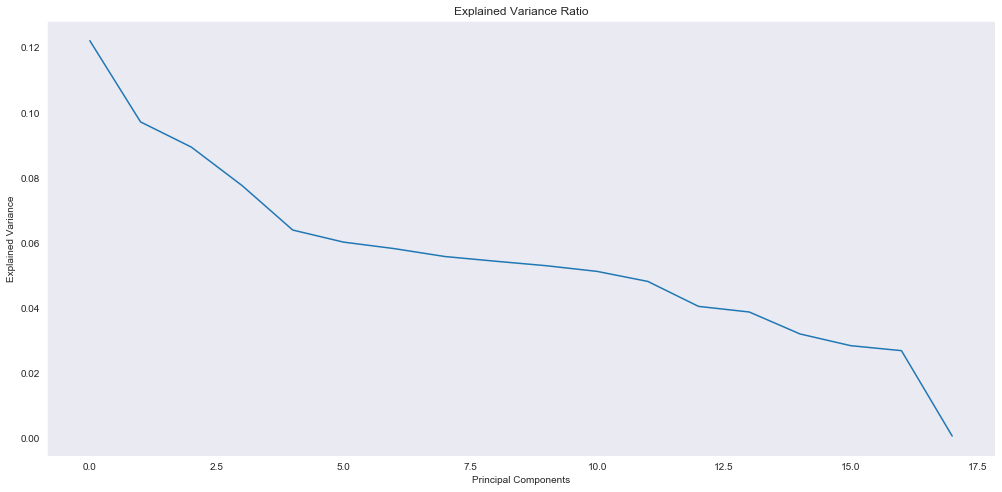

array([0.12211826, 0.09719689, 0.08947668, 0.07768074, 0.0640142 ,
       0.06031193, 0.05831869, 0.05588455, 0.05444193, 0.05306538,
       0.05132342, 0.04824778, 0.04058633, 0.03886525, 0.03212792,
       0.02853113, 0.02700364, 0.0008053 ])

In [0]:
# Plot
plt.plot(range(0,18), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()
pca.explained_variance_ratio_

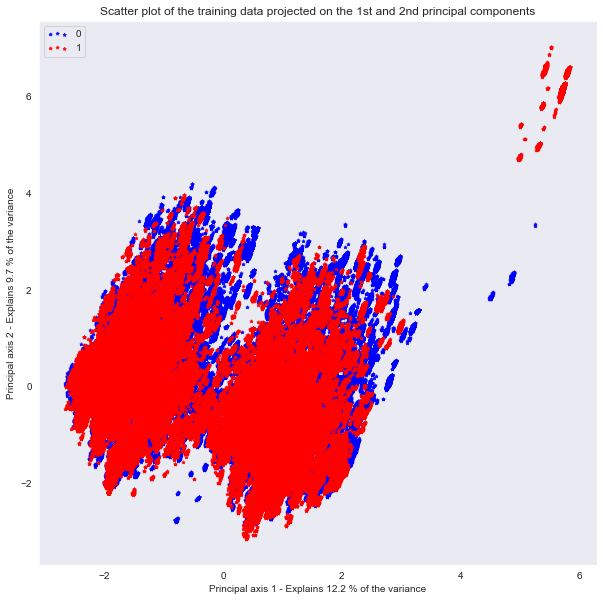

In [0]:

colors = ['blue', 'red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=10,
                alpha=.8, label=target_name, marker='*')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))
plt.show()

# Clustering to find any goups in the Data

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

range_n_clusters = [2, 3, 4, 5,6,7]

In [0]:
# for k in range_n_clusters:
#     kmeans=KMeans(n_clusters=k,verbose =20)
#     kmeans.fit(X_train)
    
#     print(k,silhouette_score(X_train,kmeans.labels_))

In [0]:
Ks=np.linspace(2,15,14)

ssw=[]
for k in Ks:
    kmeans=KMeans(n_clusters=int(k),verbose=20)
    kmeans.fit(X_train)
    ssw.append(kmeans.inertia_)
plt.plot(Ks,ssw)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 17381902.176622793
start iteration
done sorting
end inner loop
Iteration 1, inertia 17287642.157225326
start iteration
done sorting
end inner loop
Iteration 2, inertia 17217779.331220366
start iteration
done sorting
end inner loop
Iteration 3, inertia 17132456.623363942
start iteration
done sorting
end inner loop
Iteration 4, inertia 17125753.57320178
start iteration
done sorting
end inner loop
Iteration 5, inertia 17119578.542414267
start iteration
done sorting
end inner loop
Iteration 6, inertia 17118708.791422233
start iteration
done sorting
end inner loop
Iteration 7, inertia 17118238.663404025
start iteration
done sorting
end inner loop
Iteration 8, inertia 17118238.475168142
center shift 4.793037e-08 within tolerance 1.000195e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 17210860.092276257
start iteration
done sorting
end inner loop
Iteration 1, 

KeyboardInterrupt: 

In [0]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)

In [0]:
X_train_cluster = X_train

In [0]:
labels = kmeans.labels_
X_train_cluster["cluster"]=labels

In [0]:
X_train_cluster.groupby(['cluster']).mean()

In [0]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_train_cluster[X_train_cluster["cluster"]==i].as_matrix()
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')

plt.show()

#***Sampling for class Imbalance***

In [0]:
X_train,X_test,y_train,y_test

In [0]:
# OverSampling using SMOTE
print(y_train.value_counts())
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [0]:
#After Over Sampling count
np.bincount(y_train)

#***Modelling Section BaseLine Model***

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
clf=LogisticRegression()

In [0]:
param_dist = {'penalty': ['l1','l2'],
                        'class_weight':['balanced',None],
                       'C':np.linspace(0.01,100,10)}

In [0]:
# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,n_jobs=-1,verbose=20,scoring='roc_auc')
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2', None]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.630 (std: 0.001)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced'}

Model with rank: 2
Mean validation score: 0.629 (std: 0.001)
Parameters: {'penalty': 'l2', 'class_weight': None}

Model with rank: 3
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'class_weight': 'balanced'}



# Random Forest

In [0]:
# del transaction,users,device,notification

In [0]:
param_dist = {"n_estimators":[50,100,200],
              "max_depth": [3,5,6,9, None],
              "max_features": sp_randint(5, 11),
              "min_samples_split": sp_randint(5, 10),
              "min_samples_leaf": sp_randint(5, 10),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [0]:
clf = RandomForestClassifier()

In [0]:
# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,n_jobs=-1,verbose=20,scoring='roc_auc',cv=5)

In [0]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 32

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.886 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.798 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.797 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 50}



In [0]:
random_search.best_params_

In [0]:
clf = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 9, max_features= 5,class_weight = 'balanced',\
                             min_samples_leaf= 5, min_samples_split= 9, n_estimators= 50,n_jobs=-1)

In [0]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
train_pred = clf.predict(X_train)

train_score=pd.Series(list(zip(*clf.predict_proba(X_train)))[1])

real = y_train

cutoffs=np.linspace(0,1,100)

In [0]:
# See the Performance of our model on 
from sklearn.metrics import classification_report
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84    647095
           1       0.77      0.58      0.66    376441

    accuracy                           0.78   1023536
   macro avg       0.78      0.74      0.75   1023536
weighted avg       0.78      0.78      0.78   1023536



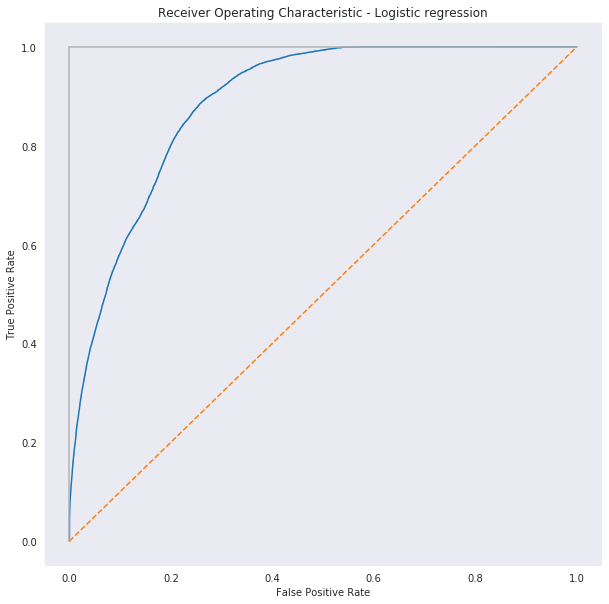

In [0]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot

false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_score)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
# Now we have to choose a cutoff to convert probabilities to hard classes.

In [0]:
KS_cut=[]
FB_score =[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*len(y_train))
    predicted[train_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])
    TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
    FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
    TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
    FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
    P=TP+FN
    N=TN+FP
    KS=(TP/P)-(FP/N)
    
    # Precision=TP/(TP+FP)
    # Recall=TP/P
    # FB=(1+1**2)*Precision*Recall/((1**2)*Precision+Recall)

    KS_cut.append(KS)
    # FB_score.append(FB)

cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut)),columns=["cutoff","KS"])

KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]

In [0]:
KS_cutoff

45    0.454545
Name: cutoff, dtype: float64

In [0]:
# Performance on test data
prob_score_test=pd.Series(list(zip(*clf.predict_proba(X_test)))[1])

predicted_test=pd.Series([0]*len(y_test))
predicted_test[prob_score_test>float(KS_cutoff)]=1

df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print('confusion matrix :\n \n ',k)
TN=k.iloc[0,0]
TP=k.iloc[1,1]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print('Precision :' ,TP/(TP+FP))
print('Recall :', TP/(P))
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',(TP/P))
print('Specificity is :',(TN/N))

confusion matrix :
 
  predicted       0      1
real                    
0          118828  42881
1           10118  84057
Precision : 0.6621894153051096
Recall : 0.8925617202017521
Accuracy is : 0.7928788044582702
Sensitivity is : 0.8925617202017521
Specificity is : 0.7348261383101744


Average precision-recall score: 0.80


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.80')

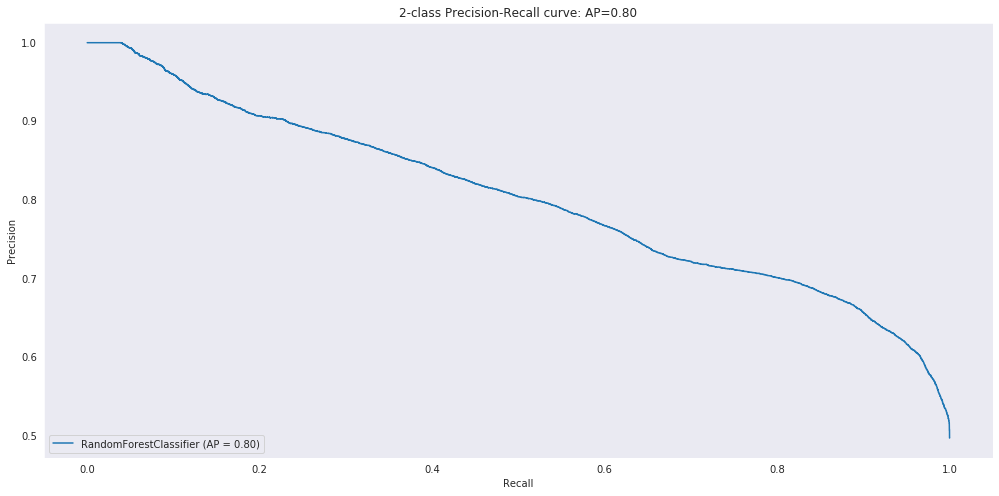

In [0]:
# Plot between precision and Recall

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:,1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### GBM

In [0]:
gbm_params={'n_estimators':[10 ,50,100,200,250],
           'learning_rate': [0.01,.05,0.1,0.4,0.5],
            'max_depth':[1,2,3,4,5,6],
#             'min_samples_split':[2,5,10,20],
#             'min_samples_leaf':[2,5,10,20],
            'subsample':[0.5,0.8,1],
            'max_features':[5,10,15]
           }

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()

In [0]:
random_search=RandomizedSearchCV(gbm,scoring='roc_auc',param_distributions=gbm_params,verbose=20,
                                 cv=5,n_iter=5,
                                 n_jobs=-1)

In [0]:
X_train.shape,y_train.shape

In [0]:
random_search.fit(X_train,y_train)

In [0]:
report(random_search.cv_results_,3)

# Question 4

***Question-4***


1.   **a** -->How would you set up a test/experiment to check whether we are                 actually reducing churn?
2.   **b** -->What metrics and techniques would you use to assess the impact                 of the business action?




In [0]:
# #@title Default title text
# Answer -a

# We will setup A/B Testing to see the impact of Model


# First we need to compare the performance of a currently deployed model (let’s call the current churn
# Model A) to that of a new version (Model B, the challenger model). Alternatively,we  want to simultaneously deploy and compare multiple models with similar
# training performances.

# After the key performance metric is chosen (e.g., model accuracy, AUC, F-measuresper user, etc.), we can apply statistical inference to evaluate performance.
# We will create a hypothesis testing which involves setting up null hypothesis (e.g., there is no significant performance difference between Model B and Model A) and an alternative
# hypothesis (e.g., Model B is performing better than Model A).



# Then we run the experiment for a fixed period of time determined by a sample size threshold ,During the experiment a portion of data is exposed to Model B(treatment/New model)
# and comparable data is exposed to Model A (“control”/previous model) and then we compare the resulting performance metrics using statistical test and 
# null hypothesis is either rejected or Accepted







### ![alt text](https://drive.google.com/uc?id=19q2UCatmwKX3uSLQS9SoUtxt-ldjmGO_)

In [0]:
#Answer b:

# *******What metrics and techniques would you use to assess the impact of the business action?**********
#Churn Evaluation Metrics:

# Below metrics evaluates the raw churn score predictions. We use this to compute evaluation metrics such as
# F-measure
# ROC curve
# Precision-Recall curve
# These different robust metrics give the data scientist/analyst in your marketing team information on how well the churn models were able to classify 
# churners and non-churners — for instance, how many people who were predicted to churn actually did 


In [0]:
# There are several questions we can ask business to see if the model is making any impact on the business.

# The normal questions that come up are:
# What is the overall accuracy?
# What % of the customers who will actually churn is the model able to tag as will churn?
# What % of the customers who will actually Not churn is the model able to tag as will Not churn?
# What % of customers predicted as churn actually churned?
# What % of customers predicted as will not churn actually Not churn?


# 1. What Is the Overall Accuracy?
# Total Predicted correctly / Total Number 

# 2. What % of the Customers Who Will Actually Churn Is the Model Able to Tag as ‘Will Churn?’
# For Example if We have 10 churned customers and we correctly predicted 8. So ratio = 8/10 = 80%

#This is also called Sensitivity or Positivity rate or Recall. Since this measure does not include what was predicted incorrectly, 
#this measure tends to be biased for imbalanced classes.
# A model that is 100% sensitive will identify all churned customers. It’s rare that any model will be 100% sensitive. 
#A model with 85% sensitivity will identify 85% of churned customers but will miss 15% of churned customers. 
#A highly sensitive model can be useful for ruling out a customer predicted as will not churn. 
#The logic is it’s highly accurate in predicting who will churn. Which means if it says this customer will not churn, we can potentially rule them out.


# 3. What % of the Customers Who Will Actually ‘Not Churn’ Is the Model Able to Tag as ‘Will Not Churn?’

# We have 15 Non churned customers and we correctly predicted 11. So ratio = 11/15 = 73.3%
# This is also called Specificity or True Negative rate. Since this measure does not include what was predicted incorrectly, this measure tends to be biased for imbalanced classes.
# A model that is 100% specificity will identify all Non churned customers. It’s rare that any model will be 100% specificity. A model with 90% specificity will identify 90% of Non churned customers, but will miss 10% of Non churned customers. A highly specificity model can be useful for identifying customer who will churn. The logic is it’s highly accurate in predicting who will Not churn. Which means if it says this customer will churn, it’s more trustworthy.
# 4. What % of Customers Predicted to Churn Actually Churned?

# We have 12 customers predicted as churned customers (all red including X) and we correctly predicted 8 (red without X). So ratio = 8/12 = 67%
# This is means out of 100 customers predicted as will churn, only 67 of them will churn and the rest 33 will not churn.
# This is also called Precision or Positive Predicted Value.

# 5. What % of Customers Predicted to Not Churn Actually Did Not Churn?

# We have 13 customers (green circles including X) predicted as ‘Not churned’ customers and we correctly predicted 11 (green without X). Ratio = 11/13 = 85 %
# This is means out of 100 customers predicted as will Not churn, 85 of them will Not churn and the rest 15 will not churn.
# This is also called Negative Predicted Value